In [1]:
import tensorflow as tf
import keras
import numpy as np
import tf_explain
import skimage.io

from tf_explain.core import GradCAM
from matplotlib import pyplot as plt

print('Notebook running: tensorflow ', tf.__version__)
print('Notebook running: keras ', keras.__version__)
print('Notebook running: numpy ', np.__version__)


Notebook running: tensorflow  2.4.1
Notebook running: keras  2.4.3
Notebook running: numpy  1.19.5


In [2]:
#Load pretrained model 

from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
model = tf.keras.models.load_model('..\\data\\model')

# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions 
# model=VGG16()

# from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
# model=VGG19()

# from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
# model=MobileNet()

# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
# model=InceptionV3()

In [3]:
model.summary()

Model: "AkinolaVGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [4]:
# load an image

img = tf.keras.preprocessing.image.load_img("..\\images\\image4.jpg", target_size=(224, 224))
# img = tf.keras.preprocessing.image.load_img("image4.jpg", target_size=(299, 299)) # inceptionv3
img = np.array(img)
data = ([img],None)

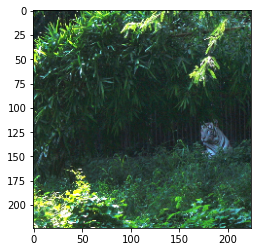

In [5]:
plt.imshow(img/255);

<function matplotlib.pyplot.show(close=None, block=None)>

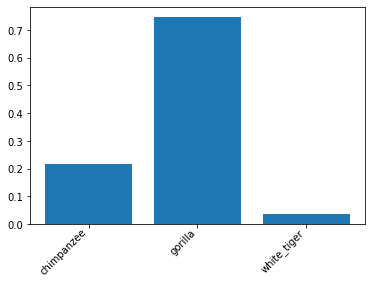

In [6]:
#making prediction
preds = np.round(model.predict(preprocess_input(np.expand_dims(img.copy(), axis=0))),5)
predict=[] 
titles=[] 
index=[]

if (model.name=='AkinolaVGG16'):
    class_names={'0':'chimpanzee', '1':'gorilla','2':'white_tiger'}
    preds_data = dict(zip(class_names.values(), preds[0]))
    titles=list(class_names.values())
    index=list(class_names.keys())
else:
    decoded_preds=decode_predictions(preds,top=10)
    class_names={}
    ind =(-preds[0]).argsort()[:10]
    for i in range (10):
        class_names[str(ind[i])]=decoded_preds[0][i][1]
        if (i<3):#getting index and labels for top 3 predictions
            index.append(ind[i])
            titles.append(decoded_preds[0][i][1])
        predict.append(decoded_preds[0][i][2])
    preds_data = dict(zip(class_names.values(), predict))

#plot results
plt.bar(range(len(preds_data)), list(preds_data.values()), align='center')
plt.xticks(range(len(preds_data)), list(preds_data.keys()),rotation=45,va='center_baseline',horizontalalignment='right')
plt.show

In [7]:
#setting the explainer to GradCAM

explainer = GradCAM()

In [8]:
#inspecting the 18th layer (block5_conv3) and getting an explanation
layer=None
# layer='conv_pw_13_relu'
# layer='block5_conv3'


grid1 = explainer.explain(data,model,int(index[0]),layer_name=layer,colormap=2,use_guided_grads=1)
grid2 = explainer.explain(data,model,int(index[1]),layer_name=layer,colormap=2,use_guided_grads=1)
grid3 = explainer.explain(data,model,int(index[2]),layer_name=layer,colormap=2,use_guided_grads=1)



(-0.5, 223.5, 223.5, -0.5)

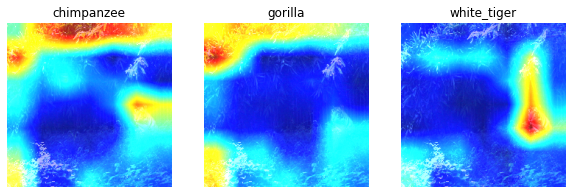

In [9]:
#plotting the results

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

axes[0].set_title(titles[0])
axes[0].imshow(grid1)
axes[0].axis("off")

axes[1].set_title(titles[1])
axes[1].imshow(grid2)
axes[1].axis("off")

axes[2].set_title(titles[2])
axes[2].imshow(grid3)
axes[2].axis("off")
